In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# SELLER P&L ANALYSIS

The goal of this exercise is to compute, for each `seller_id`:

- The **revenue** it brings (10% of each sales + 80 BRL per month)
- The **cost** associated with all its bad reviews (1-star = 100 BRL, 2-star = 50, 3-star=40)
- The resulting **profit** made by Olist for each seller

❓ Let's not start all again from scratch! Import your seller training set and investigate what you already have.


In [3]:
from olist.seller import Seller
seller = Seller()

In [4]:
sellers = seller.get_training_data()
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,3,3,1.000,218.70
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,40,41,1.025,11703.07
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,1,1,1.000,158.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,1,1,1.000,79.99
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,1,1,1.000,167.99


❓ What is missing? Write down a strategy to get your missing columns, by re-using as much of  what has already been coded in `seller.py` as possible

In [ ]:
# Your pseudo-code

❓ Update `seller.py` accordingly

Correction below, updated in `seller_updated.py`

TODO: Show students how to update their code and print results in their notebook. Debug using ipdb.set_trace() when needed

```python
def get_review_score(self):

        matching_table = self.matching_table
        orders_reviews = self.order.get_review_score()
        matching_table = matching_table[['order_id', 'seller_id']].drop_duplicates()
        df = matching_table.merge(orders_reviews, on='order_id')

        # Compute the costs
        df['cost_of_review'] = df.review_score.map({
            1: 100,
            2: 50,
            3: 40,
            4: 0,
            5: 0
        })

        df = df.groupby('seller_id',
                        as_index=False).agg({'dim_is_one_star': 'mean',
                                             'dim_is_five_star': 'mean',
                                             'review_score': 'mean',
                                             'cost_of_review': 'sum'}) # new column added here
        df.columns = ['seller_id', 'share_of_one_stars',
                      'share_of_five_stars', 'review_score', 'cost_of_reviews']

        return df

❓ Compute seller profits

updated code below

```python
def get_training_data(self):

    training_set =\
        self.get_seller_features()\
            .merge(
            self.get_seller_delay_wait_time(), on='seller_id'
           ).merge(
            self.get_active_dates(), on='seller_id'
           ).merge(
            self.get_review_score(), on='seller_id'
           ).merge(
            self.get_quantity(), on='seller_id'
           ).merge(
            self.get_sales(), on='seller_id'
           )
    # Add seller economics (revenues, profits)
    olist_monthly_fee = 80
    olist_sales_cut = 0.1

    training_set['revenues'] = training_set['months_on_olist'] * olist_monthly_fee\
        + olist_sales_cut * training_set['sales']

    training_set['profits'] = training_set['revenues'] - training_set['cost_of_reviews']

    return training_set
```

❓ Load your updated DataFrame

In [5]:
from olist.seller_updated import Seller as SellerUpdated
sellers = SellerUpdated().get_training_data()

❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

Text(0.5, 0, 'seller id')

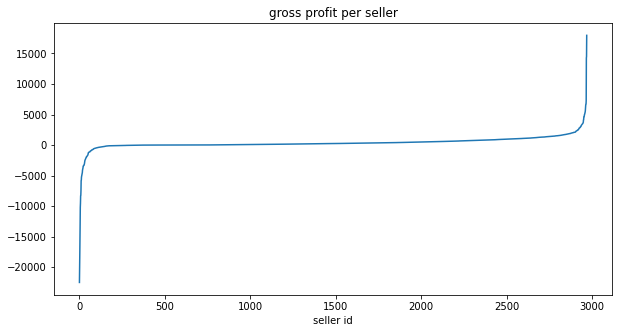

In [13]:
sorted_sellers = sellers.sort_values(by='profits')[['profits', 'n_orders', 'revenues']].reset_index()
sorted_sellers.head()

plt.figure(figsize=(10,5))
sorted_sellers.profits.plot()
plt.title('gross profit per seller')
plt.xlabel('seller id')